In [ ]:
"""
This code reads the file containg the features for each channel, both epi and non-epi, compueted using the script final_features_computation.
It performs a Mann-Whitney test for each feature and displays the results. In addition, it provides a graèhical representation
of outliers. Finally, it also contains some functions that are useful to plot the features in order to have an idea of how well 
each feature can separate epi and non epi channels

"""

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import csv
from scipy import stats
from scipy.stats import mannwhitneyu
from sklearn.metrics import roc_auc_score

In [4]:
def read_file(filename):
     """
     Read the .csv file containing the signal features corresponding to each channel and stores them in a dictionary
     
     Args:
         filename: name of the file containing the features
     Returns: 
         data_dict : dictionary containing the signal features
     """
    
    data_dict = {}
    for index, row in df.iterrows():
        key = row["key"]
        amplitude = row["amplitude"]
        rms = row["rms"]
        variance = row["variance"]
        mobility = row["mobility"]
        complexity = row["complexity"]
        entropy = row["entropy"]
        num_zerocross = row["num_zerocross"]
        data_dict[key] = {"amplitude": amplitude, "rms": rms, "variance": variance, "mobility": mobility, "complexity": complexity,"entropy": entropy, "num_zerocross": num_zerocross}
    return data_dict


def outliers_histogram(dictionary, feature):
     """
     Compute the mean and the standard deviation of the input feature and plot the histogram of the data. If the feature 
     corresponding to a channel differes more than three standard deviation from the mean, the corresponding key is displayed is the plot.
     
     Args:
         dictionary : dictionary containing all the features
         feature : feature for which the histogram is computed
     Returns: 
         none
      """
        feature_values = [dictionary[key][feature] for key in dictionary.keys()]
        keys = list(dictionary.keys())  # Ottieni le chiavi associate ai valori EPI
        
        media = np.mean(feature_values)
        deviazione_standard = np.std(feature_values)

        plt.figure(figsize=(6.66, 4))

        # data histogram
        sns.histplot(feature_values,bins = len(dictionary.keys()), kde=True, color='skyblue', label='Data')

        # plot the line corresponding to the mean
        plt.axvline(media, color='red', linestyle='--', label=f'Mean: {media:.2f}')

         # dispaly the keys of the values that differs more than three standard deviation from the mean
        for i, value in enumerate(feature_values):
            if abs(value - media) > 3 * deviazione_standard:
                plt.text(value, plt.ylim()[1] * 0.2, keys[i], rotation=90, verticalalignment='bottom', fontsize=8, color='purple')



        for i in range(1, 4):  # Shows 1, 2 and 3 standard deviations
            plt.axvline(media + i*deviazione_standard, color='orange', linestyle=':', label=f'{i}σ ({media + i*deviazione_standard:.2f})')
            plt.axvline(media - i*deviazione_standard, color='orange', linestyle=':')
            
        plt.title(f'{feature}')
        plt.xlabel('values')
        plt.ylabel('count')
        plt.legend()
        plt.show()

def statistical_analysis(dictionary_NONEPI, dictionary_EPI):
     """
     Perform the Mann-Whitney test to thest the difference between features corresponding to epi and non-epi channels, after
     checking that Z1 channel is excluded. Finally it displays the p-value and the normalized statistic corresponding to each feature.
     Args:
         dictionary_NONEPI : dictionary containing all the features for non epi channels
         dictionary_EPI : dictionary containing all the features for epi channels
     Returns: 
         none
      """
   # get the information about the name of the keys
    first_key = next(iter(dictionary_NONEPI))  
    features = dictionary_NONEPI[first_key].keys() 

    # iterates over all features
    for feature in features:
        feature_NONEPI = [dictionary_NONEPI[key][feature] for key in dictionary_NONEPI.keys()]
        feature_EPI = [dictionary_EPI[key][feature] for key in dictionary_EPI.keys() if key != "Z1"]

        
        stat, p_valU = mannwhitneyu(feature_NONEPI, feature_EPI, method='auto')

        print(f'Feature: {feature}')
#        print('Number of considered channels ', len(feature_EPI))
        print('Normalized stat:', stat / len(feature_NONEPI) / len(feature_EPI))
        print('P value:', p_valU)
        print('\n')
        
        
        
def plot_feature_comparison(dictionary_EPI, dictionary_NONEPI, feature):
     """
     Display the box plot and the violin plot for the selected feature
     Args:
         dictionary_NONEPI : dictionary containing all the features for non epi channels
         dictionary_EPI : dictionary containing all the features for epi channels
         feature : label of the feature that you want to see
     Returns: 
         none
      """   
    feature_EPI = [dictionary_EPI[key][feature] for key in dictionary_EPI.keys() if key != "Z1"]
    feature_NONEPI = [dictionary_NONEPI[key][feature] for key in dictionary_NONEPI.keys()]
    plt.figure(figsize=(10, 6))

    import pandas as pd
    data = pd.DataFrame({
        'Valori': feature_EPI + feature_NONEPI,
        'Gruppo': ['EPI'] * len(feature_EPI) + ['NON EPI'] * len(feature_NONEPI)
    })

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Gruppo', y='Valori', data=data, palette='Set2')
    plt.title(f'Box Plot - {feature}')

    # Violin plot 
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Gruppo', y='Valori', data=data, palette='Set2')
    plt.title(f'Violin Plot - {feature}')

    plt.tight_layout()
    plt.show()
    
def plot_histograms(dictionary_EPI, dictionary_NONEPI, feature):
     """
     Display the histogram for the selected feature
     Args:
         dictionary_NONEPI : dictionary containing all the features for non epi channels
         dictionary_EPI : dictionary containing all the features for epi channels
         feature : label of the feature that you want to see
     Returns: 
         none
      """   
    
    feature_EPI = [dictionary_EPI[key][feature] for key in dictionary_EPI.keys() if key != "Z1"]
    feature_NONEPI = [dictionary_NONEPI[key][feature] for key in dictionary_NONEPI.keys()]
    
    plt.figure(figsize=(6.66, 4))

    # histogram for EPI channels
    sns.histplot(feature_EPI, bins=30, color='blue', kde=True, label='EPI', alpha=0.6)

    # histogram for NONEPI channels 
    sns.histplot(feature_NONEPI, bins=30, color='orange', kde=True, label='NON EPI', alpha=0.6)

    plt.title(f'{feature}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Feature: amplitude
Normalized stat: 0.30598121601581807
P value: 6.272767682041293e-05


Feature: rms
Normalized stat: 0.30878233646399733
P value: 7.996656902922733e-05


Feature: variance
Normalized stat: 0.30878233646399733
P value: 7.996656902922733e-05


Feature: mobility
Normalized stat: 0.6651837205470423
P value: 0.0006562529238688548


Feature: complexity
Normalized stat: 0.48063931454934916
P value: 0.6907404216919476


Feature: entropy
Normalized stat: 0.22491349480968859
P value: 1.3842982882373798e-08


Feature: num_zerocross
Normalized stat: 0.7010215851046301
P value: 3.3708264552272345e-05




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


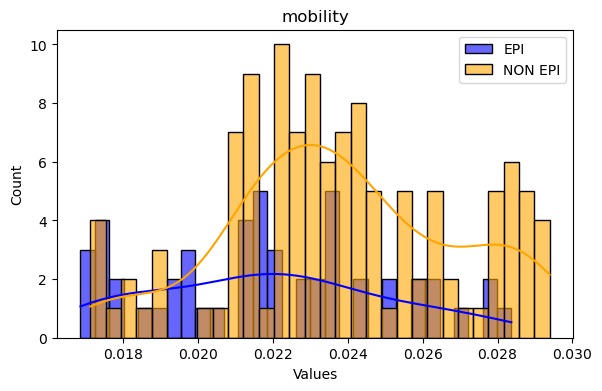

In [10]:
#DELTA WAVES
#reading the files with the features
features_delta_NONEPI = read_file('features_delta_NONEPI.csv')
features_delta_EPI = read_file('features_delta_EPI.csv')

statistical_analysis(features_delta_NONEPI,features_delta_EPI)

#outliers_histogram(features_delta_EPI, 'num_zerocross')


#plot_feature_comparison(features_delta_EPI, features_delta_NONEPI, 'entropy')

plot_histograms(features_delta_EPI, features_delta_NONEPI, 'mobility')

Feature: amplitude
Normalized stat: 0.6173999011369253
P value: 0.015473319778842257


Feature: rms
Normalized stat: 0.6116328884494975
P value: 0.02132998683384456


Feature: variance
Normalized stat: 0.6116328884494975
P value: 0.02132998683384456


Feature: mobility
Normalized stat: 0.6518372054704236
P value: 0.0017373985028241088


Feature: complexity
Normalized stat: 0.10528917449332674
P value: 3.8232541910192365e-16


Feature: entropy
Normalized stat: 0.6665018948755972
P value: 0.0005937892226376039


Feature: num_zerocross
Normalized stat: 0.681166584280771
P value: 0.00018615391606872998


Feature: amplitude
Roc AUC score: 0.3826000988630746


Feature: rms
Roc AUC score: 0.3883671115505026


Feature: variance
Roc AUC score: 0.3883671115505026


Feature: mobility
Roc AUC score: 0.34816279452957655


Feature: complexity
Roc AUC score: 0.8947108255066731


Feature: entropy
Roc AUC score: 0.3334981051244027


Feature: num_zerocross
Roc AUC score: 0.31883341571922885




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


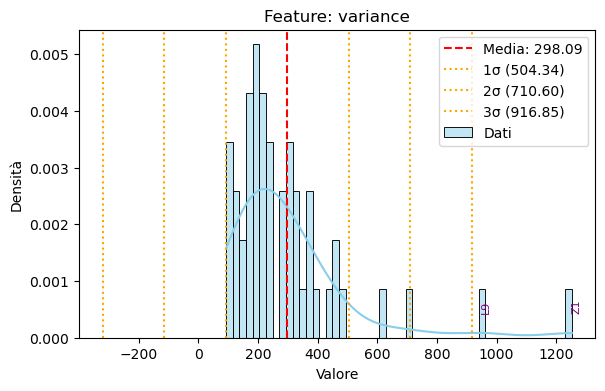

C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


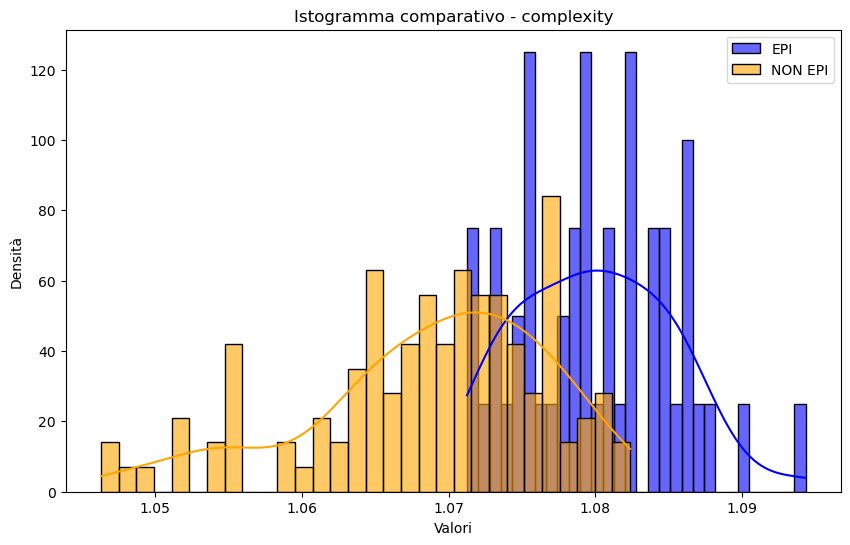

In [51]:
#TETHA WAVES
#reading the files with the features
features_theta_NONEPI = read_file('features_theta_NONEPI.csv')
features_theta_EPI = read_file('features_theta_EPI.csv')

statistical_analysis(features_theta_NONEPI,features_theta_EPI)

outliers_histogram(features_theta_EPI, 'variance')

plot_histograms(features_theta_EPI, features_theta_NONEPI, 'complexity')


Feature: amplitude
Normalized stat: 0.5142527599275004
P value: 0.7699524549871789


Feature: rms
Normalized stat: 0.4799802273850716
P value: 0.6807409978075205


Feature: variance
Normalized stat: 0.4799802273850716
P value: 0.6807409978075205


Feature: mobility
Normalized stat: 0.4906903938045806
P value: 0.848976774794015


Feature: complexity
Normalized stat: 0.7202174987642116
P value: 5.54655278988315e-06


Feature: entropy
Normalized stat: 0.7408139726478827
P value: 6.763647965851833e-07


Feature: num_zerocross
Normalized stat: 0.6679024550996869
P value: 0.0005334020853808827


Feature: amplitude
Roc AUC score: 0.4857472400724996


Feature: rms
Roc AUC score: 0.5200197726149283


Feature: variance
Roc AUC score: 0.5200197726149283


Feature: mobility
Roc AUC score: 0.5093096061954194


Feature: complexity
Roc AUC score: 0.2797825012357884


Feature: entropy
Roc AUC score: 0.2591860273521173


Feature: num_zerocross
Roc AUC score: 0.33209754490031307




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


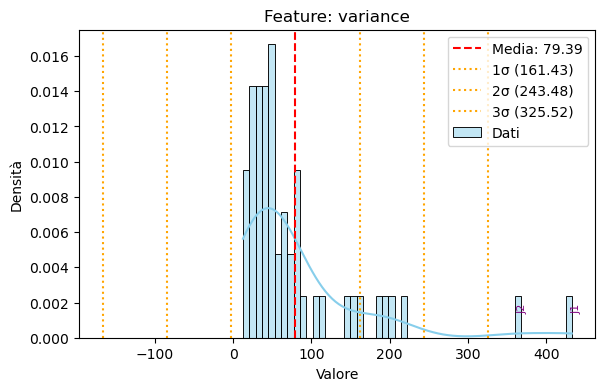

In [52]:
#ALPHA WAVES
#reading the files with the features
features_alpha_NONEPI = read_file('features_alpha_NONEPI.csv')
features_alpha_EPI = read_file('features_alpha_EPI.csv')

statistical_analysis(features_alpha_NONEPI,features_alpha_EPI)

outliers_histogram(features_alpha_EPI, 'variance')

Feature: amplitude
Normalized stat: 0.652990608007909
P value: 0.0016016823913331773


Feature: rms
Normalized stat: 0.6030647553138903
P value: 0.03356412895977769


Feature: variance
Normalized stat: 0.6030647553138903
P value: 0.03356412895977769


Feature: mobility
Normalized stat: 0.6129510627780523
P value: 0.019843421463335554


Feature: complexity
Normalized stat: 0.3432196407974955
P value: 0.0012215063744068534


Feature: entropy
Normalized stat: 0.7602570439940681
P value: 7.905118908077405e-08


Feature: num_zerocross
Normalized stat: 0.6110561871807547
P value: 0.022010035758433008


Feature: amplitude
Roc AUC score: 0.34700939199209097


Feature: rms
Roc AUC score: 0.39693524468610974


Feature: variance
Roc AUC score: 0.39693524468610974


Feature: mobility
Roc AUC score: 0.3870489372219476


Feature: complexity
Roc AUC score: 0.6567803592025045


Feature: entropy
Roc AUC score: 0.23974295600593182


Feature: num_zerocross
Roc AUC score: 0.38894381281924534




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


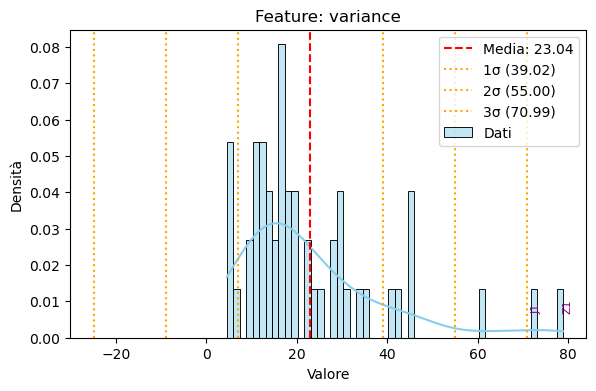

In [53]:
#BETA WAVES
#reading the files with the features
features_beta_NONEPI = read_file('features_beta_NONEPI.csv')
features_beta_EPI = read_file('features_beta_EPI.csv')

statistical_analysis(features_beta_NONEPI,features_beta_EPI)
outliers_histogram(features_beta_EPI, 'variance')

C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


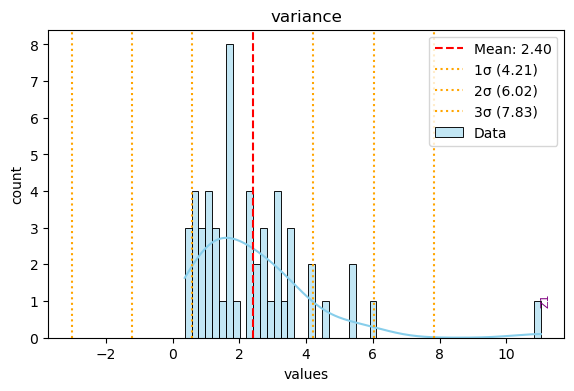

In [34]:
#GAMMA1 WAVES
#reading the files with the features
features_gamma1_NONEPI = read_file('features_gamma1_NONEPI.csv')
features_gamma1_EPI = read_file('features_gamma1_EPI.csv')

#statistical_analysis(features_gamma1_NONEPI,features_gamma1_EPI)
outliers_histogram(features_gamma1_EPI, 'variance')

Feature: amplitude
Normalized stat: 0.4977755808205635
P value: 0.9647405132510676


Feature: rms
Normalized stat: 0.4656450815620366
P value: 0.47938646465347423


Feature: variance
Normalized stat: 0.4656450815620366
P value: 0.47938646465347423


Feature: mobility
Normalized stat: 0.13774921733399242
P value: 7.770571069094536e-14


Feature: complexity
Normalized stat: 0.30614598780688745
P value: 6.363563565021977e-05


Feature: entropy
Normalized stat: 0.6676552974130828
P value: 0.00054371965023491


Feature: num_zerocross
Normalized stat: 0.1400560224089636
P value: 1.1144307504851757e-13




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


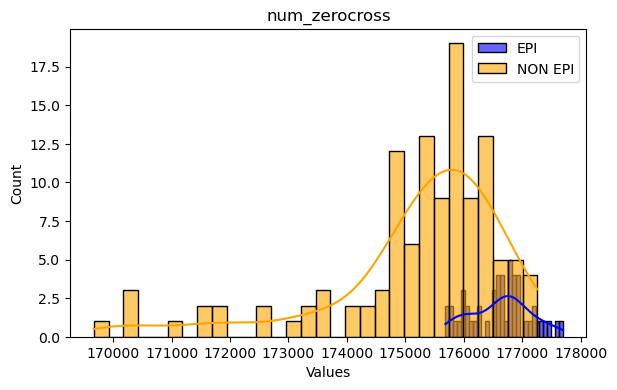

In [8]:
#GAMMA 2 WAVES
#reading the files with the features
features_gamma2_NONEPI = read_file('features_gamma2_NONEPI.csv')
features_gamma2_EPI = read_file('features_gamma2_EPI.csv')

statistical_analysis(features_gamma2_NONEPI,features_gamma2_EPI)
#outliers_histogram(features_gamma2_EPI, 'num_zerocross')
plot_histograms(features_gamma2_EPI, features_gamma2_NONEPI, 'num_zerocross')

Feature: amplitude
Normalized stat: 0.3918273191629593
P value: 0.02570214099493968


Feature: rms
Normalized stat: 0.34750370736529906
P value: 0.0016586050484489565


Feature: variance
Normalized stat: 0.34750370736529906
P value: 0.0016586050484489565


Feature: mobility
Normalized stat: 0.1675729115175482
P value: 6.950466582971535e-12


Feature: complexity
Normalized stat: 0.5951557093425606
P value: 0.049756799174020996


Feature: entropy
Normalized stat: 0.643598615916955
P value: 0.0030587059495421555


Feature: num_zerocross
Normalized stat: 0.24410940846927007
P value: 1.2975472589010886e-07


Feature: amplitude
Roc AUC score: 0.6081726808370408


Feature: rms
Roc AUC score: 0.6524962926347009


Feature: variance
Roc AUC score: 0.6524962926347009


Feature: mobility
Roc AUC score: 0.8324270884824518


Feature: complexity
Roc AUC score: 0.40484429065743943


Feature: entropy
Roc AUC score: 0.35640138408304495


Feature: num_zerocross
Roc AUC score: 0.75589059153073




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


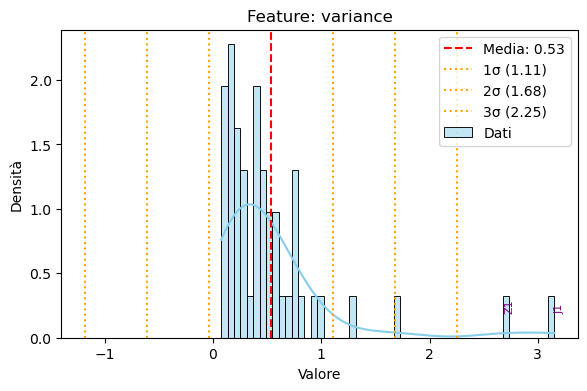

In [56]:
#GAMMA 3 WAVES
#reading the files with the features
features_gamma3_NONEPI = read_file('features_gamma3_NONEPI.csv')
features_gamma3_EPI = read_file('features_gamma3_EPI.csv')

statistical_analysis(features_gamma3_NONEPI,features_gamma3_EPI)
outliers_histogram(features_gamma3_EPI, 'variance')

Feature: amplitude
Normalized stat: 0.41687263140550335
P value: 0.08656227565557402


Feature: rms
Normalized stat: 0.37156038886142695
P value: 0.00807456339352146


Feature: variance
Normalized stat: 0.37156038886142695
P value: 0.00807456339352146


Feature: mobility
Normalized stat: 0.8073817762399078
P value: 2.2708969180063393e-10


Feature: complexity
Normalized stat: 0.4129181084198385
P value: 0.07258558217164618


Feature: entropy
Normalized stat: 0.5615422639644093
P value: 0.20466911322541792


Feature: num_zerocross
Normalized stat: 0.8179271708683473
P value: 5.401170689353239e-11




C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


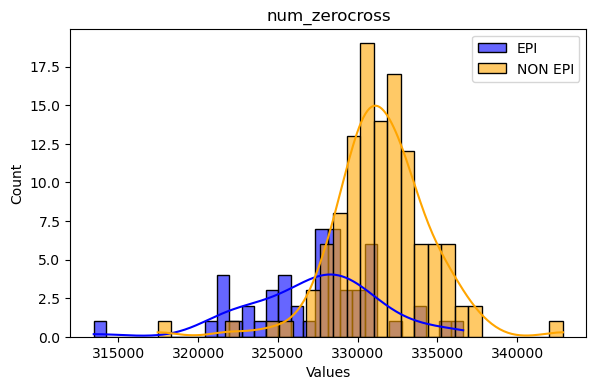

In [7]:
#GAMMA 4 WAVES
#reading the files with the features
features_gamma4_NONEPI = read_file('features_gamma4_NONEPI.csv')
features_gamma4_EPI = read_file('features_gamma4_EPI.csv')

statistical_analysis(features_gamma4_NONEPI,features_gamma4_EPI)
#outliers_histogram(features_gamma4_EPI, 'complexity')
plot_histograms(features_gamma4_EPI, features_gamma4_NONEPI, 'num_zerocross')